In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import fastcluster
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc

from ete3 import NCBITaxa, Tree, ProfileFace, AttrFace, TreeStyle, BarChartFace
ncbi = NCBITaxa()

# Plot the NCBI classification tree from file

In [2]:
Demo = True # Change to False if you want to run the script on the full dataset

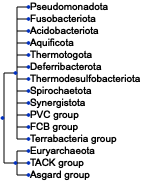

In [31]:
ProkaryoticOrders = Tree("../Data/input/ProkaryotTree.nw", format=9)# made using orthofinder, NCBI ID's are slightly different to the ones from the strains in EggNOG so that's corrected in the .nw file.

ts = TreeStyle()
ts.draw_guiding_lines = True
ts.show_leaf_name = True
ts.scale =  10
ts.show_scale = False
ProkaryoticOrders.swap_children()

order = [1224,32066,57723,200783,200918,200930,200940,203691,508458,1783257,1783270,1783272,28890,1783275,1935183]

ProkaryoticOrders.render("%%inline", tree_style=ts,dpi=100)

# Load the OG DataFrame

In [15]:
if Demo == True:
    filepath = "../Data/demo/OFOG&eOGCounts.csv"
else: filepath = "../Data/output/AllOFOG&eOGCounts.csv"

Root_OG_Counts = pd.read_csv(filepath, index_col = 0)
Root_OG_Counts.head()

,1054217,1104324,1120746,1121422,1121438,1121448,1123070,1123240,1123288,1123325,...,880074,903814,903818,907348,926567,931626,933262,944546,Loki 4,Thor
COG,,,,,,,,,,,,,,,,,,,,,
28IG4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
28K0K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
28QBX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
28TET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
28WHW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## Open the list of clusters of orthologous groups of interest 

In [33]:
COGsOI = pd.read_csv("../Data/input/AllWLPGenes.csv", sep =";", comment = "#", header = 0).loc[:,["Category","Group","GeneName","COG"]]
COGsOI

,Category,Group,GeneName,COG
0,Metabolic,MFR,fmdC,COG2218
1,Metabolic,THMPT,ftr,COG2037
2,Metabolic,THMPT,mch,COG3252
3,Metabolic,THMPT,mtd,COG1927
4,Metabolic,THMPT,mer,COG2141
5,Metabolic,THMPT,mtrH,COG1962
6,Metabolic,THF,fdhA,COG3383
7,Metabolic,THF,fhs,COG2759
8,Metabolic,THF,folD,COG0190
9,Metabolic,THF,mtdA,COG0373


In [23]:
Root_COGsOI_Counts = Root_OG_Counts.loc[COGsOI.COG]
Root_COGsOI_Counts

,1054217,1104324,1120746,1121422,1121438,1121448,1123070,1123240,1123288,1123325,...,880074,903814,903818,907348,926567,931626,933262,944546,Loki 4,Thor
COG,,,,,,,,,,,,,,,,,,,,,
COG2218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
COG2037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
COG3252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
COG1927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
COG2141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,6
COG1962,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2
COG3383,0.0,0.0,4.0,11.0,4.0,3.0,1.0,0.0,8.0,0.0,...,0.0,4.0,7.0,0.0,4.0,8.0,2.0,2.0,0,0
COG2759,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1,1
COG0190,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1


# By Genus

In [29]:
Taxonomy = pd.DataFrame(index = Root_COGsOI_Counts.columns)
Taxonomy["Kingdom"] = "NaN"
Taxonomy["Order"] = "NaN"

for ID in Taxonomy.index:
    if ID.isnumeric():
        Taxonomy.Kingdom[ID] = ncbi.get_lineage(ID)[2]
        Taxonomy.Order[ID] = ncbi.get_lineage(ID)[3]
    else: 
        Taxonomy.Kingdom[ID] = 2157
        Taxonomy.Order[ID] = 1935183

# Drop incertae sedis orders and count species per order
SpeciesCount = pd.DataFrame(Taxonomy[~Taxonomy.Order.isin([2323,49928])]).groupby("Order").size()
SpeciesCount

/Users/phivri/Applications/mambaforge/envs/PhyloETE/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 1313265 was translated into 1302351
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))


Order
1224        5
28890      13
29547       5
32066       5
40117       4
57723       5
68297       2
200783      5
200918      4
200930      3
200938      2
200940      5
203691      5
508458      5
1783257     5
1783270     5
1783272    12
1783275     4
1802340     1
1930617     1
1935183     2
2138240     2
2283796     4
2498710     1
2818505     5
3018035     3
dtype: int64

### Group counts per order and convert to percentage presence

In [30]:
RootOGs = Root_COGsOI_Counts > 0

data = RootOGs.T.merge(Taxonomy, how = "left", left_index=True, right_index=True).drop(columns = "Kingdom")

#Group by Taxonomic order
data = data.groupby(data.iloc[:,-1]).sum()

#Convert to a percentage of species for each order
data = data.divide(SpeciesCount, axis=0).loc[order]

data.head()

/var/folders/qr/vm827mh53sd6708z2k3_tnnrz3fj08/T/ipykernel_25270/2485214314.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(data.iloc[:,-1]).sum()


,COG2218,COG2037,COG3252,COG1927,COG2141,COG1962,COG3383,COG2759,COG0190,COG0373,COG0685,COG1410,COG1880,COG2069,COG1456,COG1151,COG1152,COG1614,COG0280,COG0282
Order,,,,,,,,,,,,,,,,,,,,
1224,0.0,0.0,0.0,0.0,0.8,0.0,0.6,0.2,1.0,0.40,1.00,1.0,0.0,0.0,0.0,0.0,0.2,0.0,1.0,0.6
32066,0.0,0.0,0.0,0.0,0.2,0.0,0.6,1.0,1.0,0.80,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
57723,0.0,0.0,0.0,0.0,0.8,0.0,1.0,0.2,1.0,1.00,1.00,1.0,0.0,0.2,0.2,0.0,0.0,0.2,0.4,1.0
200783,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,1.0,1.00,1.00,0.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2
200918,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.25,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


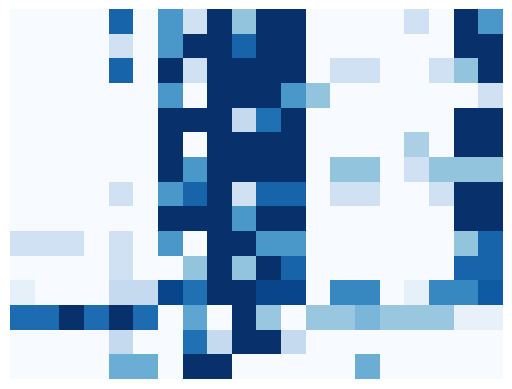

In [32]:
plt.imshow(data[COGsOI.COG], cmap='Blues', interpolation='nearest')
#plt.savefig("../Figures/SpeciesCountHeatmap.png", dpi=300)
plt.tick_params(left = False, bottom = False)
plt.axis('off')
plt.show()